In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(
    train_data=X_train, 
    train_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=None
):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

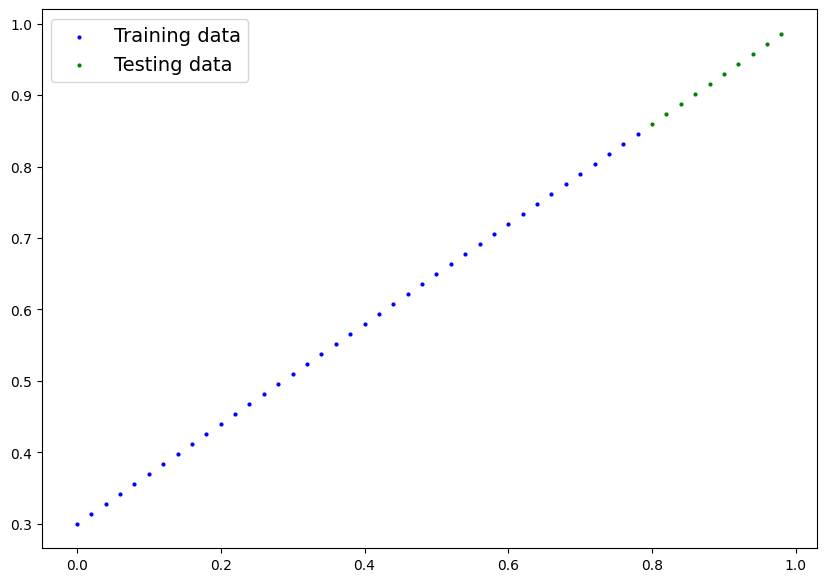

In [7]:
plot_predictions();

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(
            torch.randn(1, dtype=torch.float),
            requires_grad=True
        )

        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float),
            requires_grad=True
        )

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [9]:
# List named parameters 
torch.manual_seed(18)
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([0.5941])), ('bias', tensor([-0.1271]))])

In [10]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

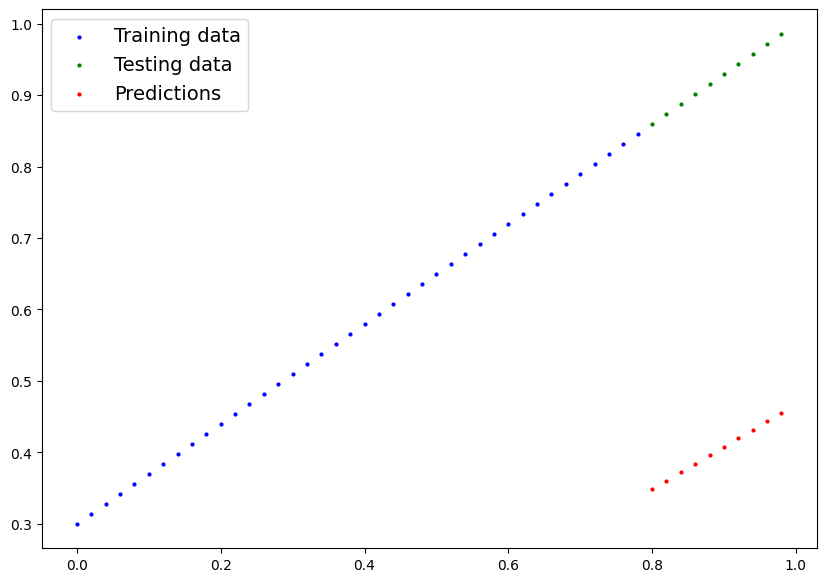

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01
) 

In [13]:
torch.manual_seed(18)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.4684281349182129 | MAE Test Loss: 0.5079200863838196 
Epoch: 10 | MAE Train Loss: 0.3532181978225708 | MAE Test Loss: 0.37321028113365173 
Epoch: 20 | MAE Train Loss: 0.23800823092460632 | MAE Test Loss: 0.23850031197071075 
Epoch: 30 | MAE Train Loss: 0.12279827892780304 | MAE Test Loss: 0.10379035770893097 
Epoch: 40 | MAE Train Loss: 0.01144769974052906 | MAE Test Loss: 0.021341806277632713 
Epoch: 50 | MAE Train Loss: 0.007114320062100887 | MAE Test Loss: 0.015843546018004417 
Epoch: 60 | MAE Train Loss: 0.003675519721582532 | MAE Test Loss: 0.00757101783528924 
Epoch: 70 | MAE Train Loss: 0.0030252381693571806 | MAE Test Loss: 0.007698935456573963 
Epoch: 80 | MAE Train Loss: 0.0030252381693571806 | MAE Test Loss: 0.007698935456573963 
Epoch: 90 | MAE Train Loss: 0.0030252381693571806 | MAE Test Loss: 0.007698935456573963 


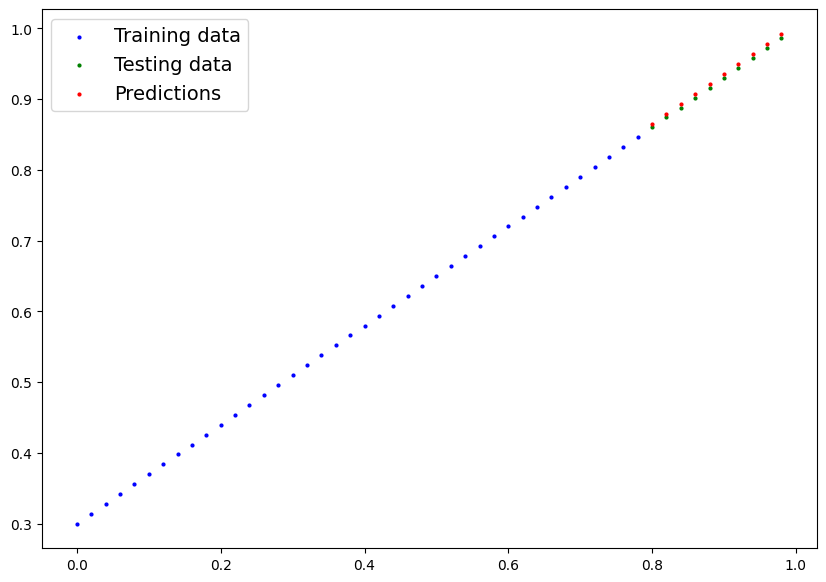

In [15]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

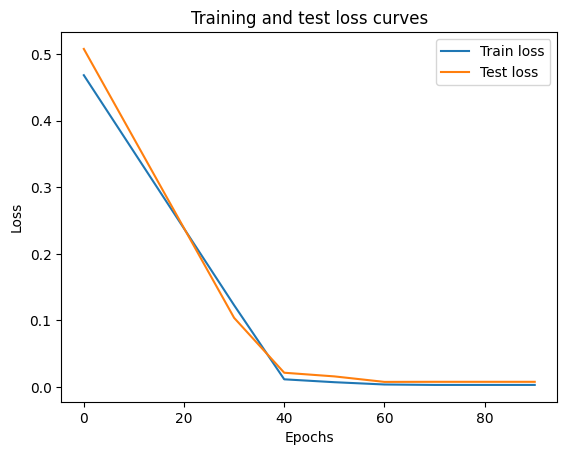

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [16]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7055])), ('bias', tensor([0.3009]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
